   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

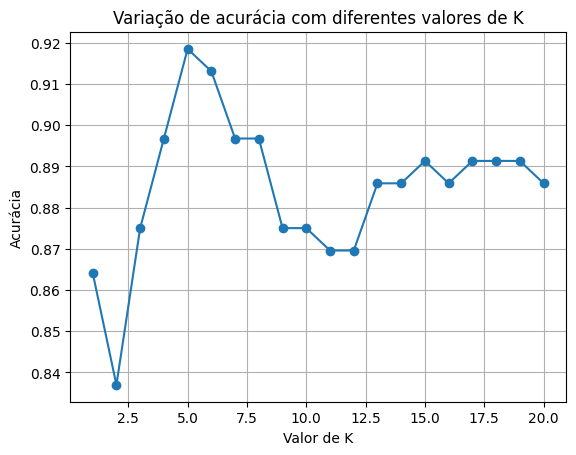


Baseado no gráfico de análise de diferentes valores de K, pode-se observar que o
valor k=5 apresenta a melhor acurácia geral para o modelo, com valor de 91.85%



In [2]:
#Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Carregamento dos dados
url = "https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/main/heart.csv"
df = pd.read_csv(url)

print(df.head())
print(df.info())

#Questão 1
print("""
O conjunto de dados possui 12 colunas, 11 delas características (features) e 1 alvo (target). As features incluem variáveis numéricas como Age,
RestingBP, Cholesterol, FastingBS, MaxHR e Oldpeak, além de variáveis categóricas como Sex, ChestPainType, RestingECG, ExerciseAngina e ST_Slope.
Essas características representam informações de pacientes, através das quais, será possível prever a presença de doenças cardíacas.
Para que o modelo de classificação funcione corretamente, as variáveis categóricas deverão ser convertidas em variáveis numéricas, permitindo o scaling dos dados.
A variável alvo, HeartDisease, indica a existência (1) ou não (0) de doença cardíaca, sendo o foco principal da previsão no modelo de machine learning.
""")

#Divisão dos dados
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

#Tranformando variáveis categóricas em variáveis numéricas para realizar o scaling
X = pd.get_dummies(X)

#Dividindo 80% dos dados para treino e 20% para validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Transformação dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

#Modelagem com KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_pred)
print(f"Acurácia com K=5: {accuracy:.4f}")
#Análise do parâmetro K
k_range = range(1, 21)
accuracies = []

for k in k_range:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train_scaled, y_train)
  y_pred_k = model.predict(X_val_scaled)
  acc = accuracy_score(y_val, y_pred_k)
  accuracies.append(acc)

#Plotando os resultados
plt.plot(k_range, accuracies, marker='o')
plt.title('Variação de acurácia com diferentes valores de K')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()

#Questão 6
print("""
Baseado no gráfico de análise de diferentes valores de K, pode-se observar que o
valor k=5 apresenta a melhor acurácia geral para o modelo, com valor de 91.85%
""")